In [1]:
import sys; sys.path.append('../src/sde_hjb_solver')
import matplotlib.pyplot as plt
import numpy as np

from hjb_solver_2d_st import SolverHJB2D
from controlled_sde_2d import DoubleWellMGF2D
from base_parser import get_base_parser

In [2]:
# initialize controlled sde object
sde = DoubleWellMGF2D(
    beta=1,
    alpha=np.array([5., 5.]),
    domain=np.full((2, 2), [-2, 2]),
    ts_pot_level=0.25,
    #target_set=np.full((2, 2), [-0.5, 0.5]),
    #target_set=np.array([[1, 2], [-0.5, 0.5]]),
)

# initialize hjb solver object
sol_hjb = SolverHJB2D(sde, h=5e-2)

In [3]:
# compute hjb solution 
sol_hjb.solve_bvp()
sol_hjb.compute_value_function()
sol_hjb.compute_optimal_control()

# compute mean first hitting time
sol_hjb.mfht = sde.compute_mfht()

# save
#sol_hjb.save()

In [4]:
# report
#sol_hjb.write_report(x=-1)

In [5]:
# evaluate in grid
sol_hjb.get_perturbed_potential_and_drift()

In [8]:
# plot potential

# axis limits
xlim = -2, 2#-1.8, 1.8
ylim = -2, 2#-1.8, 1.8

# levels
vmax = 50
n_levels = 8
levels = np.logspace(0.01, np.log(vmax), n_levels + 1, base=np.e)
levels = np.append(0.1, levels)
levels = np.round(levels, decimals=1)

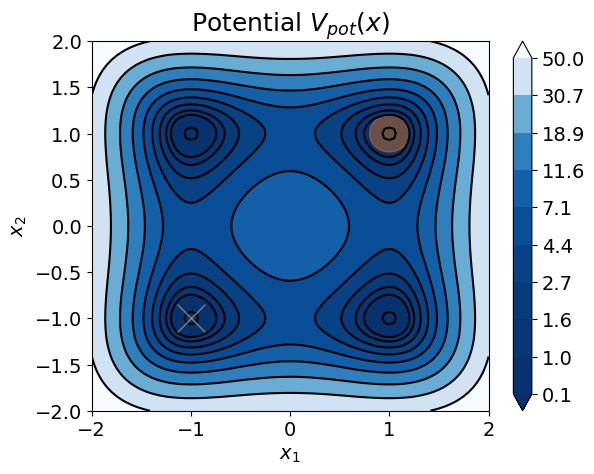

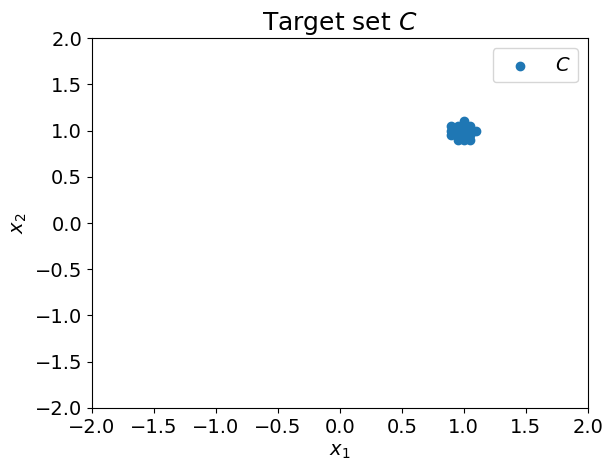

In [9]:
target_set_patch = plt.Circle((1, 1), 0.2, color='tab:orange', alpha=0.4, label='$C$')
sde.plot_2d_potential(
    levels=levels,
    xlim=xlim, ylim=ylim,
    target_set_patch=target_set_patch,
    x_init=(-1, -1),
)

# plot target sets
sde.plot_target_set()

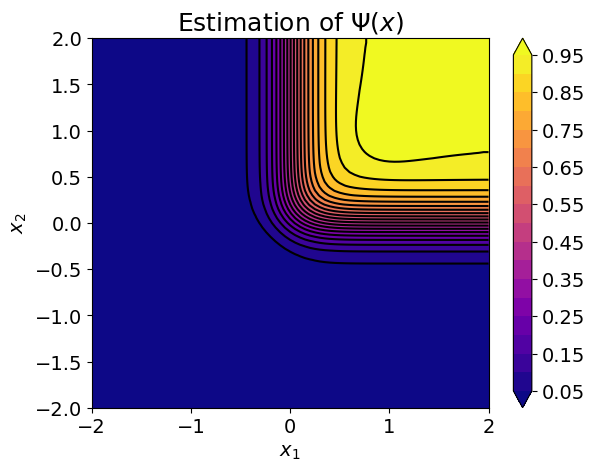

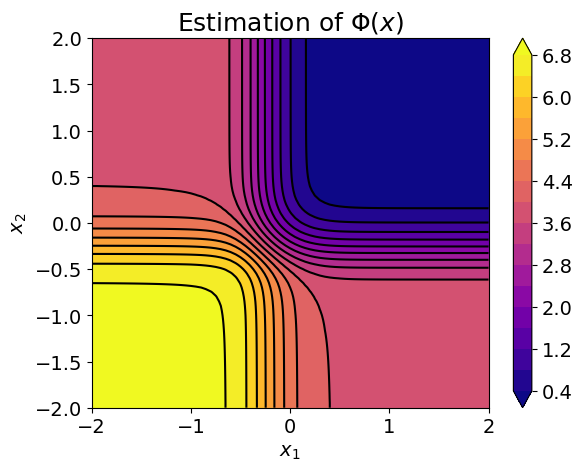

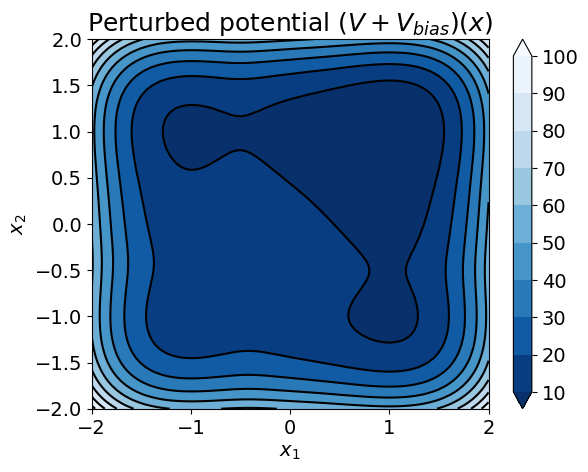

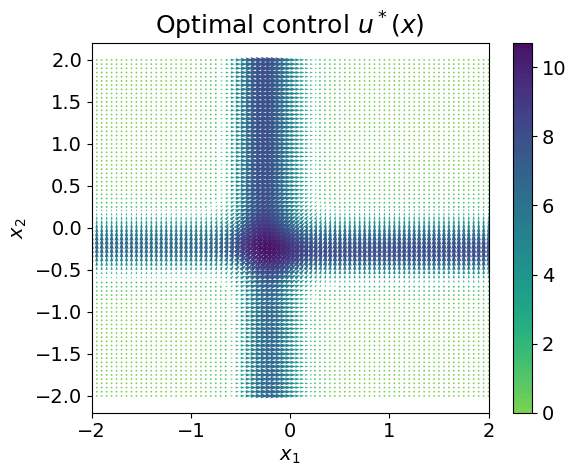

In [8]:
# plots
sol_hjb.plot_2d_psi(levels=20, xlim=xlim, ylim=ylim)
sol_hjb.plot_2d_value_function(levels=20, xlim=xlim, ylim=ylim)
sol_hjb.plot_2d_perturbed_potential(levels=10, xlim=xlim, ylim=ylim)
sol_hjb.plot_2d_control(scale=None, width=0.005, xlim=xlim, ylim=ylim)
#sol_hjb.plot_1d_perturbed_drift()

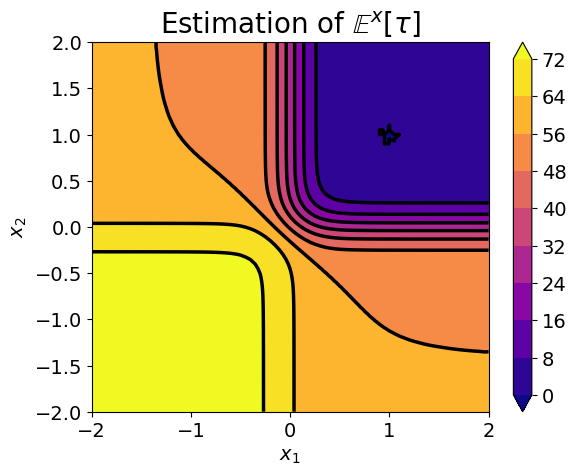

In [8]:
# estimate mean first hitting time
sol_hjb.plot_2d_mfht()